In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


In [9]:
# Load the encoded dataset
encoded_file_path = r"D:\CADT University\CADT-Y3\CodeAllSub\Capstone\Capstone-Project-I\data\processed\lyleab_file\encoded_cleaned_top15diseases.csv"
df = pd.read_csv(encoded_file_path)

# Split dataset into features (X) and target (y)
X = df.drop(columns=['Disease_Encoded'])
y = df['Disease_Encoded']

# Step 1: Check the class distribution
print("Class Distribution:\n", y.value_counts())


Class Distribution:
 Disease_Encoded
3     120
10    120
0     120
2     120
13    120
14    120
4     120
5     120
6     120
12    120
1     120
11    120
9     120
7     120
8     120
Name: count, dtype: int64


In [10]:
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can also set a specific ratio to oversample class 6
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution after SMOTE
print("Resampled Class Distribution:\n", pd.Series(y_train_resampled).value_counts())

Resampled Class Distribution:
 Disease_Encoded
6     84
14    84
0     84
4     84
13    84
7     84
2     84
11    84
12    84
1     84
5     84
9     84
10    84
3     84
8     84
Name: count, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [12]:
# Define Random Forest model with class weight balanced
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at each leaf node
}

# Set up GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get best model and hyperparameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f'Best hyperparameters found: {best_params}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Accuracy: 0.8574074074074074

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       1.00      1.00      1.00        36
           2       0.95      1.00      0.97        36
           3       0.95      1.00      0.97        36
           4       0.35      1.00      0.52        36
           5       1.00      1.00      1.00        36
           6       0.00      0.00      0.00        36
           7       1.00      1.00      1.00        36
           8       1.00      0.94      0.97        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       0.92      1.00      0.96        36
          13       1.00      1.00      1.00        36
          14       1.00      0.06      0.11        36

    accuracy                           0.86       540
   macro avg       0.87   

d:\Downlaod\APPLICATION\Anaconda\App_File\envs\condaEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Downlaod\APPLICATION\Anaconda\App_File\envs\condaEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Downlaod\APPLICATION\Anaconda\App_File\envs\condaEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

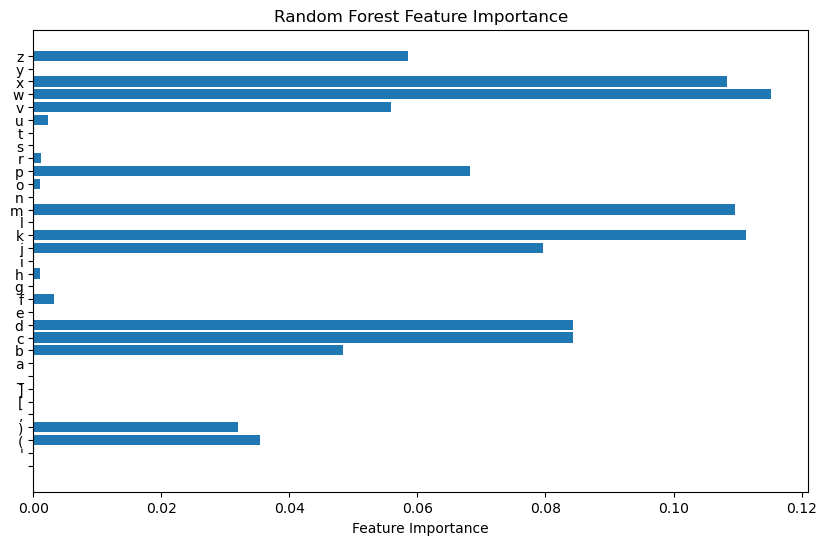

In [13]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optionally, you can also visualize feature importance
feature_importances = best_rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()
